In [9]:
import cv2
import numpy as np

img = cv2.imread('im.jpg')
b = img.copy()
# set green and red channels to 0
b[:, :, 0] = 0
b[:, :, 2] = 0
img = b
gray = cv2.cvtColor(img,cv2.COLORMAP_SUMMER)
edges = cv2.Canny(img,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow(img)

TypeError: Required argument 'mat' (pos 2) not found

/Users/tomininvladislav/env/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


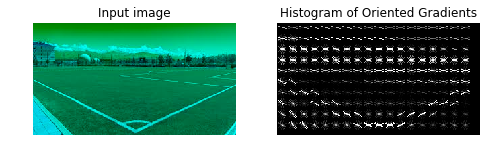

In [14]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = cv2.imread("im.jpg")
image[:, :, 0] = 0
#image[:, :, 2] = 0
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [17]:
import cv2
import numpy as np

img = hog_image_rescaled
# set green and red channels to 0


edges = cv2.Canny(img,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv2.imshow(img)

error: OpenCV(3.4.3) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


In [56]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
    # Make a copy of the original image.
    img = np.copy(img)
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    # Merge the image with the lines onto the original.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0) #######
    # Return the modified image.
    return img


def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

height = 160
width = 300
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]

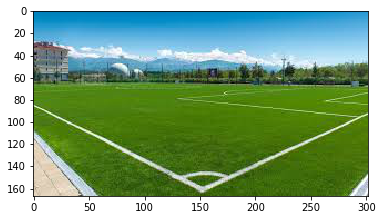

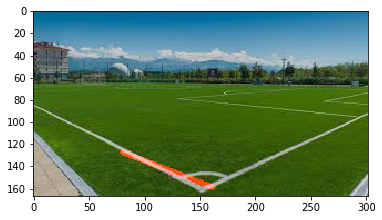

In [65]:
import matplotlib.image as mpimg

image = mpimg.imread('im.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()
